# Embed Items

embedding the items on unsorted basket list

In [22]:
import pandas as pd
from gensim.models import Word2Vec
import itertools
import random
import math

In [23]:
PATH_INTERIM = '../../data/interim/'
PATH_MODEL = '../../model/w2v_embed/'

In [24]:
file1 = open(PATH_INTERIM+"basket_1.txt","r") 
bask1 = file1.readlines()
bask1 = [i.replace('\n','').split(',') for i in bask1]

file2 = open(PATH_INTERIM+"basket_2.txt","r") 
bask2 = file2.readlines()
bask2 = [i.replace('\n','').split(',') for i in bask2]

In [25]:
len(bask1), len(bask2)

(13936, 165979)

In [26]:
bask1[:10]

[['burgers', 'eggs', 'meatballs'],
 ['chutney'],
 ['avocado', 'turkey'],
 ['energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'],
 ['low fat yogurt'],
 ['french fries', 'whole wheat pasta'],
 ['light cream', 'shallot', 'soup'],
 ['frozen vegetables', 'green tea', 'spaghetti'],
 ['french fries'],
 ['eggs', 'pet food']]

## Basket Description

<AxesSubplot:ylabel='Frequency'>

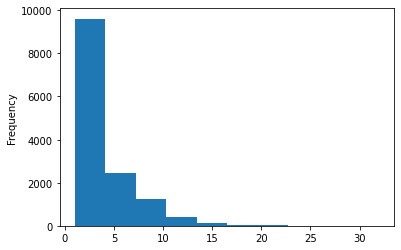

In [27]:
%matplotlib inline
pd.Series([len(b) for b in bask1]).plot(kind = 'hist')

In [28]:
pd.Series([len(b) for b in bask1]).describe()

count    13936.000000
mean         3.815442
std          3.230632
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         32.000000
dtype: float64

In [29]:
all_unique_items = list(set((','.join([','.join(b) for b in bask1])).split(',')))

In [30]:
len(all_unique_items)

269

## Embedding

Experiment on Different Embedding :


In [48]:
# ?Word2Vec

In [49]:
for ep in [25,50,100,150,200,250]:
    for win in [1,2,3]:


        emb1 = Word2Vec(epochs=ep,
                        sentences=bask1,
                        vector_size=85, 
                        window=win, 
                        min_count=20, 
                        workers=12)

        model_individu_path = PATH_MODEL + "w2v_" + str(ep) + "_" + str(win) + "_1.model"
        # model_individu_path = PATH_MODEL + "w2v_test_1.model"

        emb1.save(model_individu_path)

In [50]:
for ep in [25,50,100,150,200,250]:
    for win in [1,2,3]:
        
        emb1 = Word2Vec(epochs=ep,
                        sentences=bask2,
                        vector_size=85, 
                        window=win, 
                        min_count=430, 
                        workers=12)

        model_individu_path = PATH_MODEL + "w2v_" + str(ep) + "_" + str(win) + "_2.model"
#         model_individu_path = PATH_MODEL + "w2v_test_2.model"
        emb1.save(model_individu_path)

## Example Embedding

In [51]:
load_model1 = Word2Vec.load(PATH_MODEL+"w2v_100_1_1.model")
# load_model1 = Word2Vec.load(PATH_MODEL+"w2v_test_1.model")

load_model1.wv.vectors.shape

(238, 85)

In [52]:
load_model2 = Word2Vec.load(PATH_MODEL+"w2v_100_1_2.model")
# load_model2 = Word2Vec.load(PATH_MODEL+"w2v_test_2.model")
load_model2.wv.vectors.shape

(238, 85)

In [53]:
load_model1.wv.index_to_key[:10]

['whole milk',
 'rolls buns',
 'other vegetables',
 'mineral water',
 'soda',
 'chocolate',
 'eggs',
 'yogurt',
 'french fries',
 'spaghetti']

In [54]:
# load_model1.wv['burgers']
load_model1.wv.most_similar('burgers')

[('cider', 0.8023151159286499),
 ('cake', 0.7247859239578247),
 ('energy drink', 0.723987877368927),
 ('black tea', 0.7231013178825378),
 ('brownies', 0.7164468765258789),
 ('carrots', 0.7123656272888184),
 ('cottage cheese', 0.7056016325950623),
 ('cooking oil', 0.6976324915885925),
 ('champagne', 0.6965814232826233),
 ('eggplant', 0.6940662860870361)]

In [56]:
load_model2.wv.most_similar('burgers')

[('pancakes', 0.6371687650680542),
 ('green tea', 0.6316144466400146),
 ('shrimp', 0.6146035194396973),
 ('milk', 0.6122610569000244),
 ('fresh bread', 0.6080905199050903),
 ('cooking oil', 0.5909576416015625),
 ('salmon', 0.5748562812805176),
 ('soup', 0.5743606686592102),
 ('spaghetti', 0.573957085609436),
 ('mineral water', 0.5698654055595398)]